# Support Vector Machines

In [1]:
import numpy as np

import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neural_network
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import mlutils
#from sklearn.inspection import DecisionBoundaryDisplay

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def load_dataset_up_down(size, seed=39):
    np.random.seed(seed)
    x = np.random.poisson(5, size) * (np.random.randint(0,2, size) * 2 - 1)
    y = (np.random.poisson(5, size) + 1) * (np.random.randint(0,2, size) * 2 - 1)
    X = np.array(list(zip(x,y)))
    Y = (X[:,1] > 0).astype(np.int8)
    return X, Y

Generamos datos de prueba

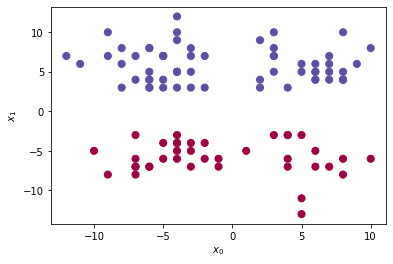

In [3]:
X, Y = load_dataset_up_down(100)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.show()

Hacemos un clasificador basado en una máquina de soporte compacto ([Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html))

$0 = \mathbf{w^T x} + b = w_0 x_0 + w_1 x_1 + intercept \rightarrow x_1 =  - \frac{w_0}{w_1} x_0 - \frac{intercept}{w_1}$ 

x_1 = 0.0013 * x_0 + -0.0008


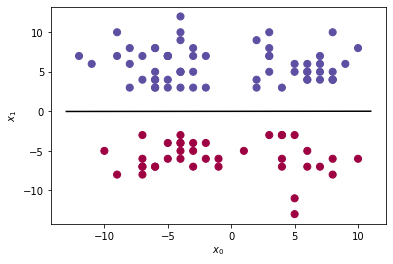

In [4]:
clf = sklearn.svm.LinearSVC()
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
b = - clf.intercept_[0] / w[1]
x_0 = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
x_1 = a * x_0 + b

plt.plot(x_0, x_1, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
print (("x_1 = %.4f * x_0 + %.4f") % (a, b))

### Qué pasaría ahora con más datos?

Accuracy: 100 


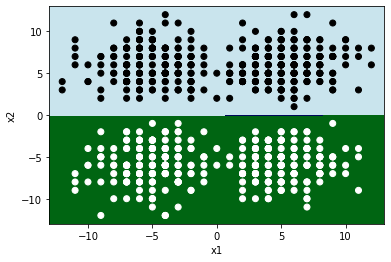

In [5]:
X, Y = load_dataset_up_down(800)
mlutils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

### Que pasa si tenemos una base de datos con algo de ruido?

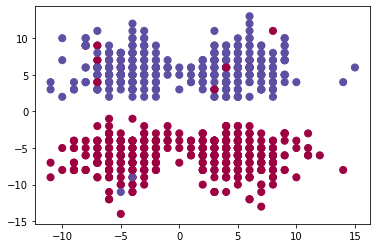

In [6]:
X, Y = load_dataset_up_down(800, 1)
some_noise = np.random.binomial(1, .03, Y.shape[0])
Y = np.logical_xor(Y, some_noise).astype(np.int8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

x_1 = 0.0028 * x_0 + 0.0570


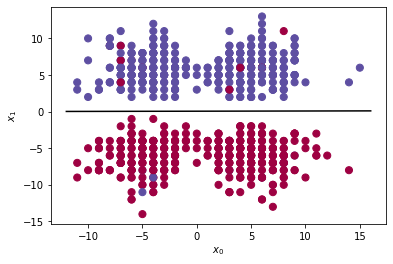

In [7]:
clf = sklearn.svm.LinearSVC()
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
b = - clf.intercept_[0] / w[1]
x_0 = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
x_1 = a * x_0 + b

plt.plot(x_0, x_1, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
print (("x_1 = %.4f * x_0 + %.4f") % (a, b))

Probemos con un conjunto de datos distinto y veamos como impacta la elección del parámetro C

Estamos minimizando ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC))

$\lambda({C}) ||w||^2 + \frac{1}{n}\sum_{i=1}^n \max(0, 1-y_i (\mathbf{w^T x_i}-b))$

En principio, grandes valores de C resultan en márgenes menores y pequeños valores de C resultan en márgenes más amplios.

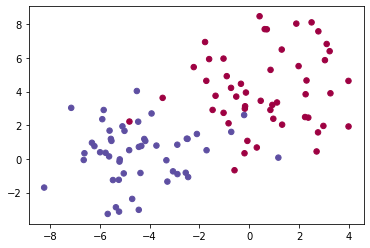

In [8]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=3, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Spectral)
plt.show()

0.1 - Accuracy: 94 


NameError: name 'DecisionBoundaryDisplay' is not defined

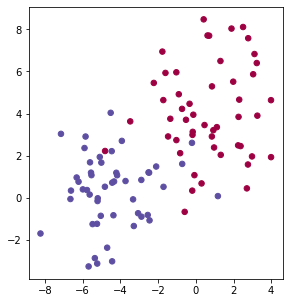

In [9]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([0.1, 100]):
    # "hinge" is the standard SVM loss
    clf = sklearn.svm.LinearSVC(C=C, loss="hinge", random_state=26).fit(X, Y)
    predictions = clf.predict(X)
    print (C, '- Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Spectral)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()